<a href="https://colab.research.google.com/github/ana-lan/Sentiment-Analysis-of-Twitter-Data/blob/main/Sentiment2Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import re

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter

In [ ]:
query = "(from: elonmusk) until:2022-11-25 since:2006-01-01"
tweets = []
limit = 25000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

                           Date             User  \
0     2022-11-24 23:59:58+00:00       nilrebolas   
1     2022-11-24 23:59:54+00:00  EricGovEconChur   
2     2022-11-24 23:59:54+00:00    DaveUnair2012   
3     2022-11-24 23:59:43+00:00  WhiteWolfSpeaks   
4     2022-11-24 23:59:35+00:00    Steve93478014   
...                         ...              ...   
24995 2022-11-23 19:57:15+00:00       casperyeth   
24996 2022-11-23 19:57:13+00:00         BlueAV8R   
24997 2022-11-23 19:57:10+00:00        DanooHana   
24998 2022-11-23 19:57:09+00:00          Jbc_195   
24999 2022-11-23 19:57:08+00:00   Bishop_of_Sass   

                                                   Tweet  
0      @elonmusk Dude @elonmusk please research where...  
1      @daveoneillsf @skylark_design @M1k30xlong @Roy...  
2      @zerohedge They should learn from @elonmusk an...  
3      @bananaguymike81 @BAYC6964 @conradonline @elon...  
4           @elonmusk Another bogus poll from Elon Musk.  
...                  

In [ ]:
#consumerKey = "ocFMO3JjO57h6g0pTwyFzyVSi"
#consumerSecret = "xlw09SdYBXerMoVc1h6YhVHmG9ILpFaO6f4oyLehJntBjEJsqm"
#accessToken = "1436938238422257664-LQ0A2Ljycuuj6QlE4WJFMW5hPE2u91"
#accessTokenSecret = "1tj3L9Te0CIpoLLmZagchhCNI15BAjIy9wqBulss2iEdX"

In [ ]:
## Authenticate
#auth = tw.OAuthHandler(consumerKey, consumerSecret)
## Set Tokens
#auth.set_access_token(accessToken, accessTokenSecret)
## Instantiate API
#api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#hashtag = "#twitter"
#query = tw.Cursor(api.search, q=hashtag).items(100)
#post = [tweet.text for tweet in query]
#
#post

In [ ]:
i=1
for tweet in df['Tweet'][:5]:
  string = tweet
  print(str(i) + ')' + string)
  i=i+1


1)@elonmusk Dude @elonmusk please research where vox populi, vox dei is coming from. You’d be surprised….
2)@daveoneillsf @skylark_design @M1k30xlong @Royal_____Rebel @Iuuk96 @elonmusk I'm not using "free speech" declarations.  There is just no point in mocking.

Proverbs 24:17-18
17 (A)Do not rejoice when your enemy falls,
    and let not your heart be glad when he stumbles,
18 lest the Lord see it and be displeased,
    and turn away his anger from him.
3)@zerohedge They should learn from @elonmusk and do what they need to do for their oil, it’s theirs if they choose to burn it all
4)@bananaguymike81 @BAYC6964 @conradonline @elonmusk @WSJmarkets I wouldn’t buy a damn thing from you, Michael. Have you noticed how not one person agrees with you? Does that not register in your bot brain?
5)@elonmusk Another bogus poll from Elon Musk.


In [ ]:
twitter = pd.DataFrame([tweet for tweet in df['Tweet']], columns = ['Tweets'])

In [ ]:
twitter.head()

,Tweets
0,@elonmusk Dude @elonmusk please research where...
1,@daveoneillsf @skylark_design @M1k30xlong @Roy...
2,@zerohedge They should learn from @elonmusk an...
3,@bananaguymike81 @BAYC6964 @conradonline @elon...
4,@elonmusk Another bogus poll from Elon Musk.


In [ ]:
twitter.shape

(25000, 1)

In [ ]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text) # Removing all @ mentions
  text = re.sub('#', '', text) # Removing all #s
  text = re.sub('RT[\s]+', '', text) #Removing all RTs
  text = re.sub('https?:\/\/\S+', '', text) # Removing all hyperlinks
  return text

In [ ]:
twitter['Tweets'] = twitter['Tweets'].apply(cleanTxt)

In [ ]:
twitter.head()

,Tweets
0,"Dude please research where vox populi, vox d..."
1,"_design _____Rebel I'm not using ""free spe..."
2,They should learn from and do what they need...
3,"I wouldn’t buy a damn thing from you, Mic..."
4,Another bogus poll from Elon Musk.


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
twitter['Subjectivity'] = twitter['Tweets'].apply(getSubjectivity)
twitter['Polarity'] = twitter['Tweets'].apply(getPolarity)

In [ ]:
twitter

,Tweets,Subjectivity,Polarity
0,"Dude please research where vox populi, vox d...",0.000000,0.000000
1,"_design _____Rebel I'm not using ""free spe...",0.666667,0.066667
2,They should learn from and do what they need...,0.000000,0.000000
3,"I wouldn’t buy a damn thing from you, Mic...",0.000000,0.000000
4,Another bogus poll from Elon Musk.,0.000000,0.000000
...,...,...,...
24995,Finally some quality news in the crypto world...,0.750000,0.250000
24996,I love my Model 3. I think it’s amazing that ...,0.440000,0.360000
24997,There's no hate coming from Elon. You need ...,0.900000,0.400000
24998,"Henry Blodgett, the founder of business insi...",0.600000,-0.100000


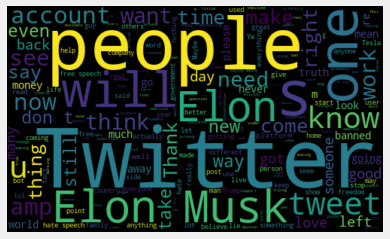

In [ ]:
allWords = ' '.join([twts for twts in twitter['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
twitter['Analysis'] = twitter['Polarity'].apply(getAnalysis)

In [ ]:
twitter

,Tweets,Subjectivity,Polarity,Analysis
0,"Dude please research where vox populi, vox d...",0.000000,0.000000,Neutral
1,"_design _____Rebel I'm not using ""free spe...",0.666667,0.066667,Positive
2,They should learn from and do what they need...,0.000000,0.000000,Neutral
3,"I wouldn’t buy a damn thing from you, Mic...",0.000000,0.000000,Neutral
4,Another bogus poll from Elon Musk.,0.000000,0.000000,Neutral
...,...,...,...,...
24995,Finally some quality news in the crypto world...,0.750000,0.250000,Positive
24996,I love my Model 3. I think it’s amazing that ...,0.440000,0.360000,Positive
24997,There's no hate coming from Elon. You need ...,0.900000,0.400000,Positive
24998,"Henry Blodgett, the founder of business insi...",0.600000,-0.100000,Negative


In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        25000 non-null  object 
 1   Subjectivity  25000 non-null  float64
 2   Polarity      25000 non-null  float64
 3   Analysis      25000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 781.4+ KB


In [ ]:
positive = twitter.loc[twitter['Analysis'].str.contains('Positive')]
positive.drop(['Subjectivity', 'Polarity'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
positive.head()

,Tweets,Analysis
1,"_design _____Rebel I'm not using ""free spe...",Positive
7,"Mr. Elon Musk, I want to Report someone delibe...",Positive
8,Very good. Since took over I can use the hash...,Positive
10,"It’s the right move. The more you dig in, the...",Positive
11,"Your definitions of racism, sexism, anti-LGB...",Positive


In [ ]:
positive.shape

(12296, 2)

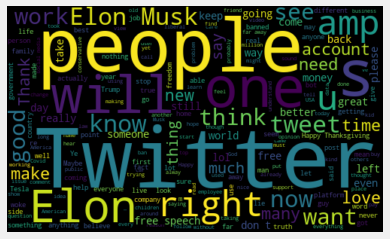

In [ ]:
allWords = ' '.join([twts for twts in positive['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
negative = twitter.loc[twitter['Analysis'].str.contains('Negative')]
negative.drop(['Subjectivity', 'Polarity'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
negative.head()

,Tweets,Analysis
13,Seriously. muskQuOtes. Capital 'Q'? Guess we...,Negative
17,"“Superspreaders of hate, abuse and harassment ...",Negative
18,_takeuchi Looks like you've been doing plen...,Negative
21,Spoken like a true fascist by claiming cen...,Negative
23,Yupp - and we pay over $100/month for a vo...,Negative


In [ ]:
negative.shape

(6154, 2)

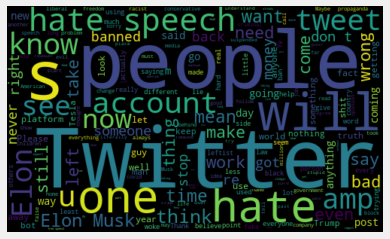

In [ ]:
allWords = ' '.join([twts for twts in negative['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
neutral = twitter.loc[twitter['Analysis'].str.contains('Neutral')]
neutral.drop(['Subjectivity', 'Polarity'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
neutral.head()

,Tweets,Analysis
0,"Dude please research where vox populi, vox d...",Neutral
2,They should learn from and do what they need...,Neutral
3,"I wouldn’t buy a damn thing from you, Mic...",Neutral
4,Another bogus poll from Elon Musk.,Neutral
5,"Did PayPal's Peter Thiel &amp; David Sacks, ...",Neutral


In [ ]:
neutral.shape

(6550, 2)

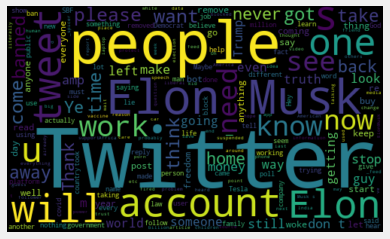

In [ ]:
allWords = ' '.join([twts for twts in neutral['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

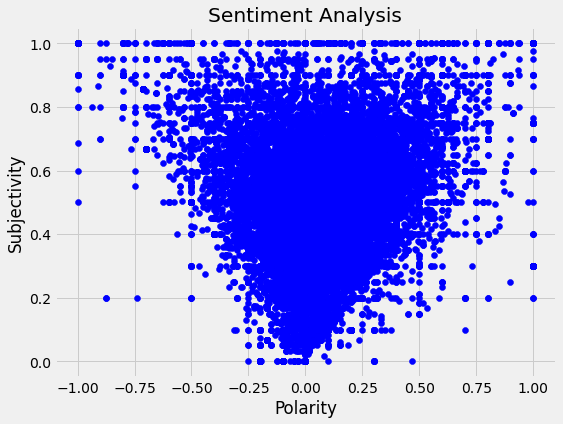

In [ ]:
plt.figure(figsize = (8,6))
for i in range(0, twitter.shape[0]):
  plt.scatter(twitter["Polarity"][i], twitter["Subjectivity"][i], color = "Blue")
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
print(str(round(positive.shape[0]/twitter.shape[0]*100, 1))+ ' %')

49.2 %


In [ ]:
print(str(round(negative.shape[0]/twitter.shape[0]*100, 1))+ ' %')

24.6 %


In [ ]:
print(str(round(neutral.shape[0]/twitter.shape[0]*100, 1))+ ' %')

26.2 %


In [ ]:
twitter['Analysis'].value_counts()

Positive    12296
Neutral      6550
Negative     6154
Name: Analysis, dtype: int64

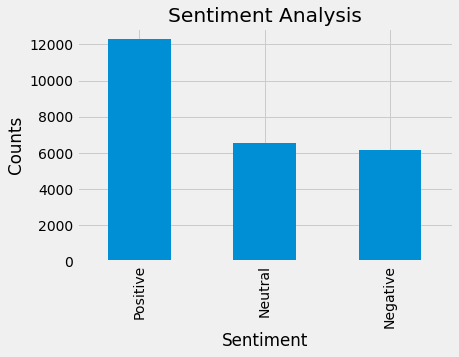

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
twitter['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
twitter.shape

(25000, 4)